In [1]:
#Simple Moving Average(SMA) has some issues
#1. Smaller windows will lead to more 'noise' rather than signal
#2. It will always lag by the size of the window itself e.g.if window size is 7 then the first 7 days wont have a SMA
#3. It will never reach the full peak or valley of the data due to averaging
#4. Does not really inform us of possible future behaviour, it just describes trends in your data
#5. Extreme historical values can also affect your SMA significantly

In [2]:
#so to fix some of these issues we can use the Exponentially Weighted Moving Average

In [4]:
#reduces the lag and puts more weight on values that occured more recently
#as the values get closer to the present time we put more weight on them
#the actual weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number
#of periods given a window size

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
airline = pd.read_csv('airline_passengers.csv', index_col='Month') #we are not using parse_dates = True as in this
                                                                   #case we first need to drop some na values

In [7]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [9]:
airline.index  #atm the index is a string index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-04', '1960-05', '1960-06', '1960-07', '1960-08', '1960-09',
       '1960-10', '1960-11', '1960-12',
       'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'],
      dtype='object', name='Month', length=145)

In [12]:
airline.dropna(inplace=True)

In [13]:
airline.index = pd.to_datetime(airline.index)

In [14]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [15]:
airline.index #the index is now in datetime format

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [16]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [18]:
airline['6 month SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12 month SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [20]:
airline.head(15)

,Thousands of Passengers,6 month SMA,12 month SMA
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,NaN,NaN
1949-03-01,132.0,NaN,NaN
1949-04-01,129.0,NaN,NaN
1949-05-01,121.0,NaN,NaN
1949-06-01,135.0,124.500000,NaN
1949-07-01,148.0,130.500000,NaN
1949-08-01,148.0,135.500000,NaN
1949-09-01,136.0,136.166667,NaN


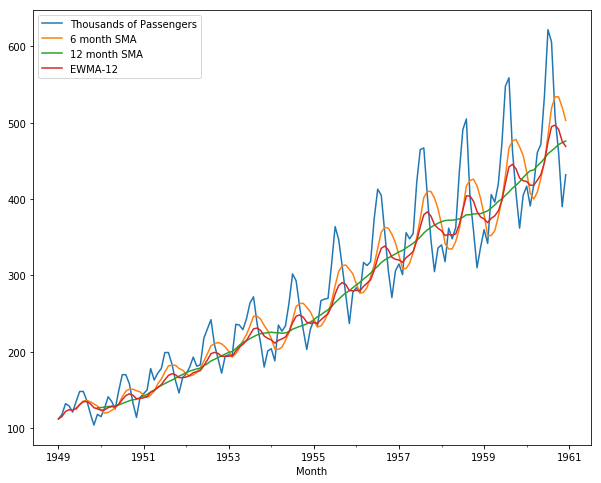

In [24]:
airline.plot(figsize=(10,8))

In [25]:
#EWMA

In [26]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

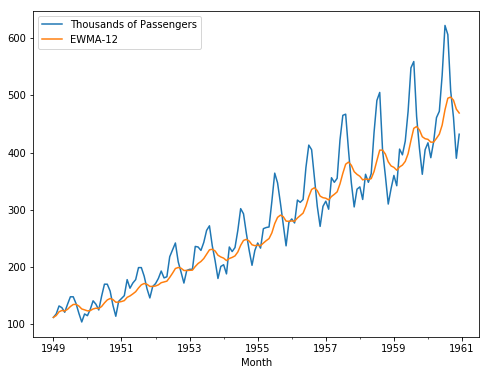

In [30]:
airline[['Thousands of Passengers','EWMA-12']].plot(figsize=(8,6))
#notice the seasonility is clearer closer to the present time as more weight is placed on these values

In [31]:
#span corresponds to what is commonly called an N-day EWMA
#span decided how many days to go back
#a 6 day span will let the EWMA look back 6 days at each row

#half life is the period of time it takes for the exponential weight to reduce to 0.5

#alpha specifies the smoother factor directly

#we typically specify span as it is the most intuitive